In [12]:
#!pip install livelossplot
#!printf "\n\n##################\n\nOUR GPU CONFIGURATION IS:\n\n"
#!nvidia-smi

# <font color='red'>IMPORT</font>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras.utils.vis_utils import plot_model

# Helper libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

from livelossplot import PlotLossesKeras

reload(plt)
np.set_printoptions(suppress=True)
print(tf.__version__)

2.12.0


# <font color='red'>EXPLORE THE DATA</font>

In [ ]:
#fashion_mnist = tf.keras.datasets.fashion_mnist

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
# Use this if working in Google Collab
# Remember to change file path 
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset_new/test',
    seed=42,
)

train_images = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset_new/train',
    seed=42,
)

Found 218 files belonging to 2 classes.
Found 1234 files belonging to 2 classes.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Use this if working in Jupyter Notebook 
# loading training data
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset_new/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
#    image_size= (img_height, img_width),
#    batch_size=batch_size

)

# loading testing data
test_images = tf.keras.preprocessing.image_dataset_from_directory(
'dataset_new/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
#    image_size= (img_height, img_width),
#    batch_size=batch_size

)

NotFoundError: ignored

In [ ]:
class_names = train_images.class_names

In [ ]:
print(
    f"Train IMGs shape: {train_images.shape}\n",
    f"Test IMGs shape: {test_images.shape}"
)

AttributeError: '_BatchDataset' object has no attribute 'shape'

2023-05-12 14:42:46.925233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2467]
	 [[{{node Placeholder/_4}}]]
2023-05-12 14:42:46.928838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2467]
	 [[{{node Placeholder/_4}}]]


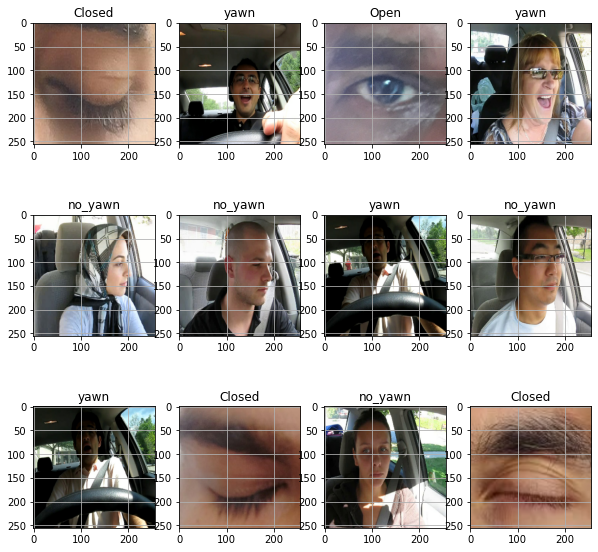

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [ ]:
#we need to check for classes and counts (of classes)

In [ ]:
print(f"Train labels: {train_labels} ] Length: {len(train_labels)}\n")
print("Value counts:")
pd.Series(train_labels).map(pd.Series(FASHION_CLASS_NAMES)).value_counts()

Train labels: [9 0 0 ... 3 0 5] ] Length: 60000

Value counts:


NameError: name 'FASHION_CLASS_NAMES' is not defined

# <font color='red'>PREPROCESS THE DATA</font>

In [ ]:
#Deleting the yawn folders: 
import shutil
import os

def remove_class(directory, class_name):
    class_dir = os.path.join(directory, class_name)
    if os.path.exists(class_dir):
        shutil.rmtree(class_dir)
        print(f"Removed directory: {class_dir}")
    else:
        print(f"Directory not found: {class_dir}")

remove_class('dataset_new/train', 'yawn')
remove_class('dataset_new/test', 'yawn')
remove_class('dataset_new/train', 'no_yawn')
remove_class('dataset_new/test', 'no_yawn')

Directory not found: dataset_new/train/yawn
Directory not found: dataset_new/test/yawn
Removed directory: dataset_new/train/no_yawn
Removed directory: dataset_new/test/no_yawn


In [ ]:
#At this point, TensorFlow is still expecting to find the images in the 'yawn' and 'no_yawn' directories, 
# which we have deleted. When calling tf.keras.preprocessing.image_dataset_from_directory, TensorFlow creates 
# a list of file paths to all the images in your dataset. If we delete the images or directories after this 
# list has been created, TensorFlow will still try to access them and you will get a NotFoundError. Therefore, 
# we need to recreate the train_images and test_images:  

# loading training data
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset_new/train',
    seed=42
)

# loading testing data
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset_new/test',
    seed=42
)

Found 1234 files belonging to 2 classes.
Found 218 files belonging to 2 classes.


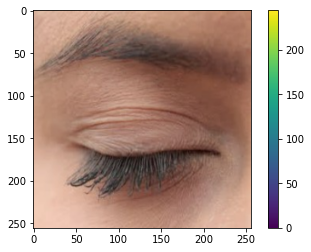

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels
images_batch, labels_batch = next(iter(train_images))

# Select a random image from the batch
random_image = np.random.choice(range(images_batch.shape[0]))

plt.figure()
plt.imshow(images_batch[random_image].numpy().astype("uint8"))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#normalizing the images:
train_images = train_images / 255.0
test_images = test_images / 255.0

TypeError: unsupported operand type(s) for /: '_BatchDataset' and 'float'

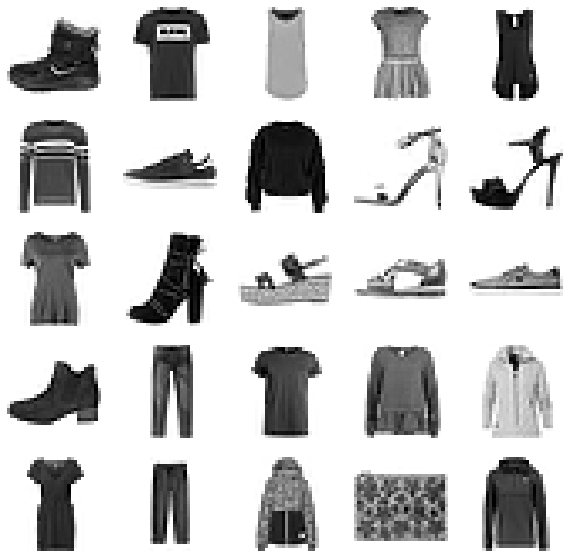

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis("off")
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(FASHION_CLASS_NAMES[train_labels[i]])
plt.show()

# <font color='red'>BUILD THE MODEL</font>

In [ ]:
#Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
plot_model(
    model, 
    show_shapes=True, 
    show_dtype=True,
    show_layer_names=True, 
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# <font color='red'>COMPILE THE MODEL</font>

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# <font color='red'>TRAIN THE MODEL</font>

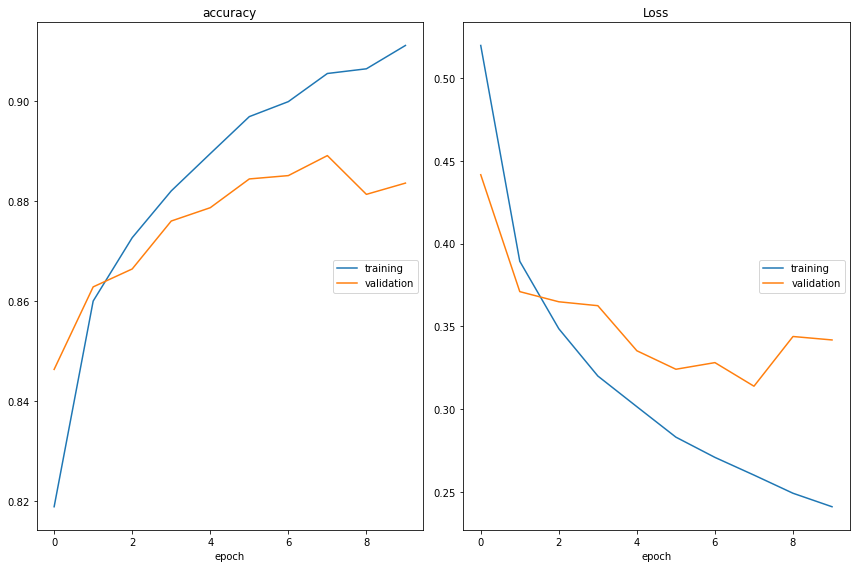

accuracy
	training         	 (min:    0.819, max:    0.911, cur:    0.911)
	validation       	 (min:    0.846, max:    0.889, cur:    0.884)
Loss
	training         	 (min:    0.241, max:    0.520, cur:    0.241)
	validation       	 (min:    0.314, max:    0.442, cur:    0.342)
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2409 - accuracy: 0.9111 - val_loss: 0.3418 - val_accuracy: 0.8836


In [ ]:
#FEED THE MODEL
model.fit(
    train_images, 
    train_labels,  
    epochs=10,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1,
)

# <font color='red'>EVALUATE THE MODEL</font>

In [ ]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


print(f'\nTrain accuracy: {train_acc}\nTest accuracy: {test_acc}')

1875/1875 - 2s - loss: 0.2647 - accuracy: 0.9043 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 0.3742 - accuracy: 0.8778 - 469ms/epoch - 1ms/step

Train accuracy: 0.904283344745636
Test accuracy: 0.8777999877929688


# <font color='red'>MAKE PREDICTIONS</font>

In [ ]:
probability_model = tf.keras.Sequential(
    [
        model, 
        tf.keras.layers.Softmax()
    ]
)

In [ ]:
plot_model(
    probability_model, 
    show_shapes=True, 
    show_dtype=True,
    show_layer_names=True, 
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([0.00002518, 0.        , 0.00000906, 0.00000031, 0.00012651,
       0.00189466, 0.00000843, 0.0089308 , 0.00000139, 0.9890036 ],
      dtype=float32)

In [ ]:
i = random.choice(range(predictions.shape[0]))
pred = np.argmax(predictions[i])
f"Higest probability for class: {pred} ({FASHION_CLASS_NAMES[pred]}) | Correct label: {test_labels[i]} ({FASHION_CLASS_NAMES[test_labels[i]]})"

'Higest probability for class: 6 (Shirt) | Correct label: 6 (Shirt)'

In [ ]:
#Examining the test label shows that this classification is correct:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(f"{FASHION_CLASS_NAMES[predicted_label]} {100*np.max(predictions_array):2.0f}% ({FASHION_CLASS_NAMES[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(len(FASHION_CLASS_NAMES)), FASHION_CLASS_NAMES, size='small', rotation=30)
  plt.yticks(range(100))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# <font color='red'>VERIFY PREDICTIONS</font>

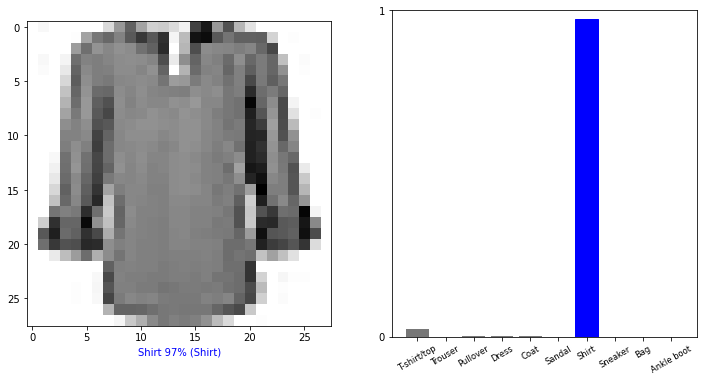

In [ ]:
i = random.choice(range(predictions.shape[0]))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

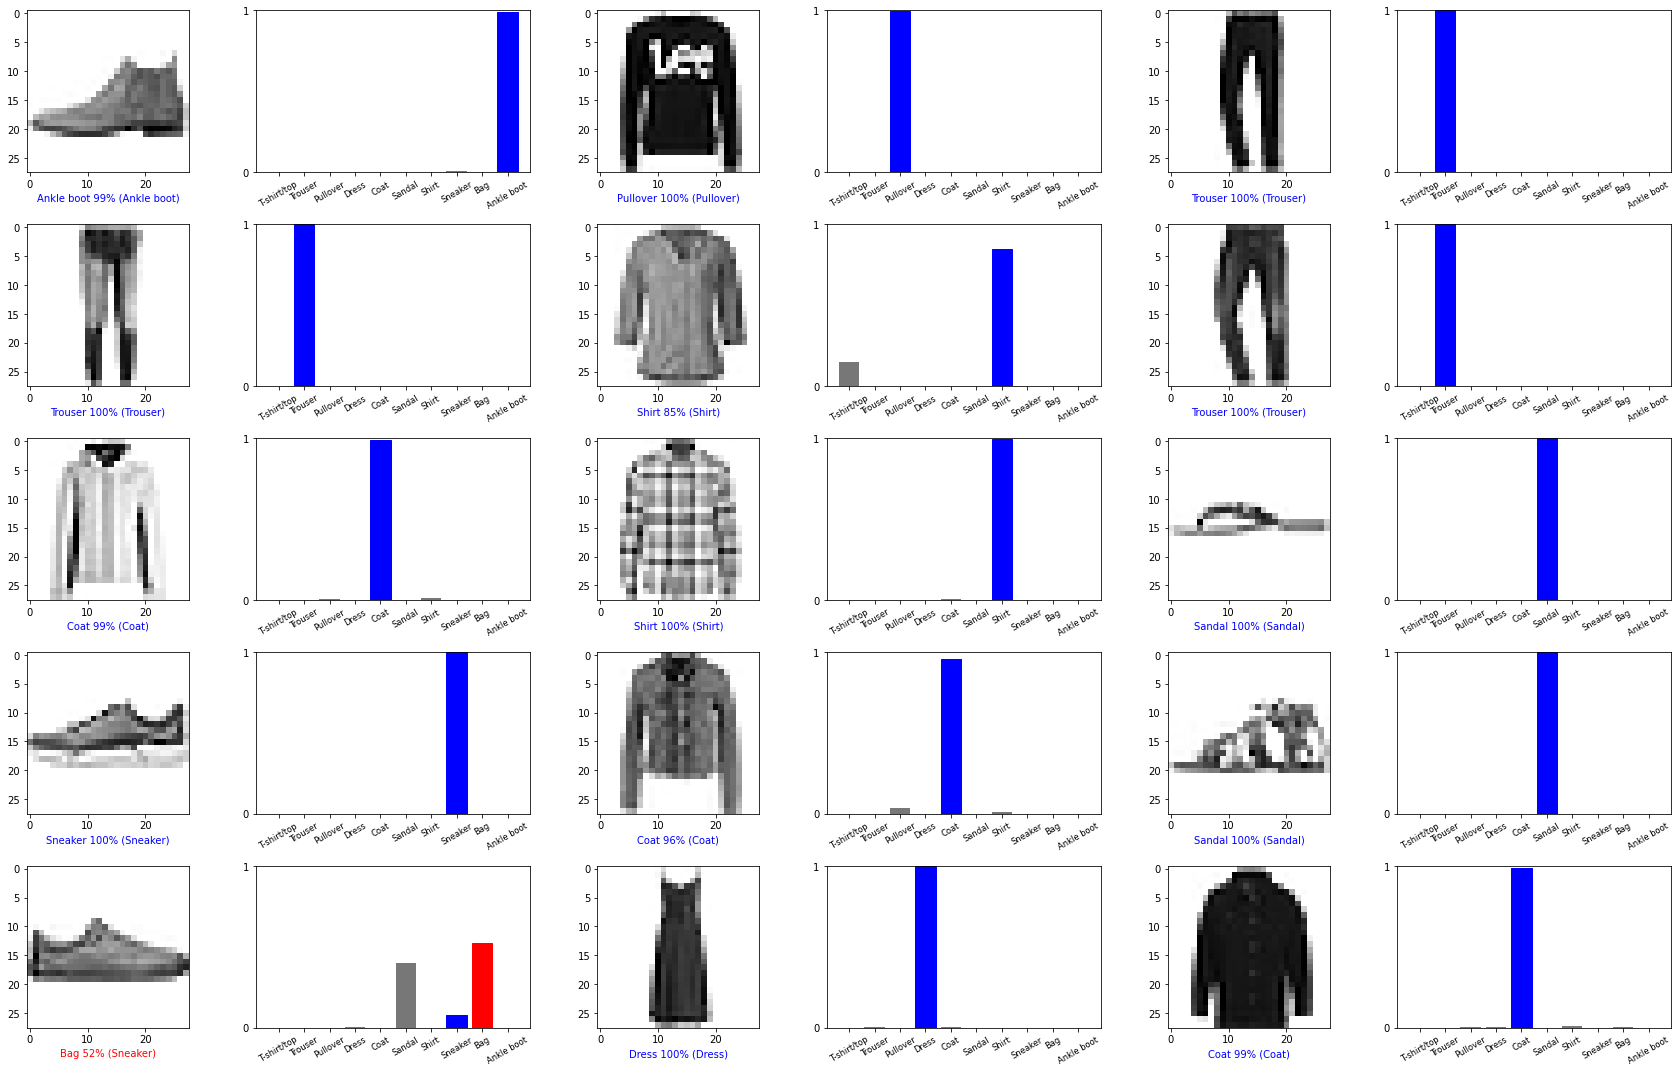

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*4*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# <font color='red'>USE THE TRAINED MODEL</font>

In [ ]:
# Grab an image from the test dataset.
i = random.choice(range(test_images.shape[0]))
img = test_images[i]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
#PREDICT THE CORRECT LABEL
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[0.00728808 0.9926932  0.00000525 0.00000167 0.0000005  0.
  0.00001118 0.         0.00000014 0.        ]]


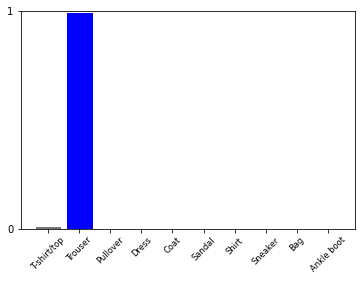

In [ ]:
plot_value_array(
    i, 
    predictions_single[0], 
    test_labels
)
plt.xticks(range(10), FASHION_CLASS_NAMES, rotation=45)
plt.show()

In [ ]:
#Grab the predictions for our (only) image in the batch:
pred_cat = np.argmax(predictions_single[0])
pred_cat, FASHION_CLASS_NAMES[pred_cat]

(1, 'Trouser')